<a href="https://colab.research.google.com/github/Kateriiina/Lesson/blob/main/%D0%93%D0%BE%D0%BB%D0%BE%D0%B2%D0%BD%D1%96_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Кількість головних компонент, які пояснюють 95% дисперсії: 10
      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
PC1      0.218902      0.103725        0.227537   0.220995         0.142590   
PC2     -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
PC3     -0.008531      0.064550       -0.009314   0.028700        -0.104292   
PC4      0.041409     -0.603050        0.041983   0.053434         0.159383   
PC5      0.037786     -0.049469        0.037375   0.010331        -0.365089   
PC6      0.018741     -0.032179        0.017308  -0.001888        -0.286374   
PC7     -0.124088      0.011400       -0.114477  -0.051653        -0.140669   
PC8     -0.007452      0.130675       -0.018687   0.034674        -0.288975   
PC9     -0.223110      0.112699       -0.223739  -0.195586         0.006425   
PC10     0.095486      0.240935        0.086385   0.074956        -0.069293   

      mean compactness  mean concavity  mean concave points  mean sy

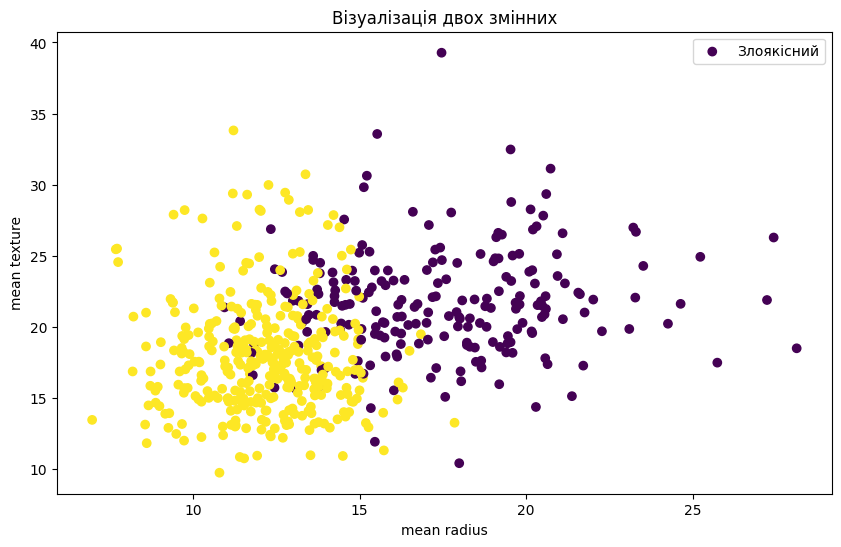

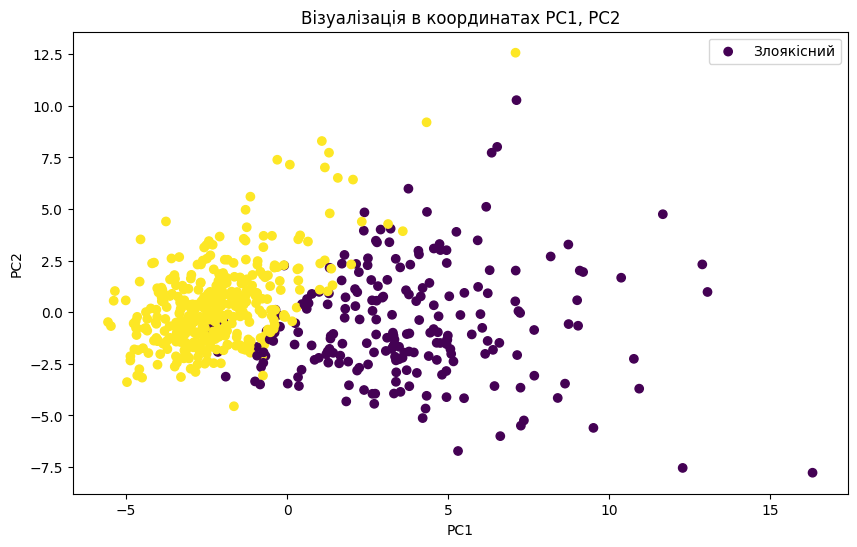

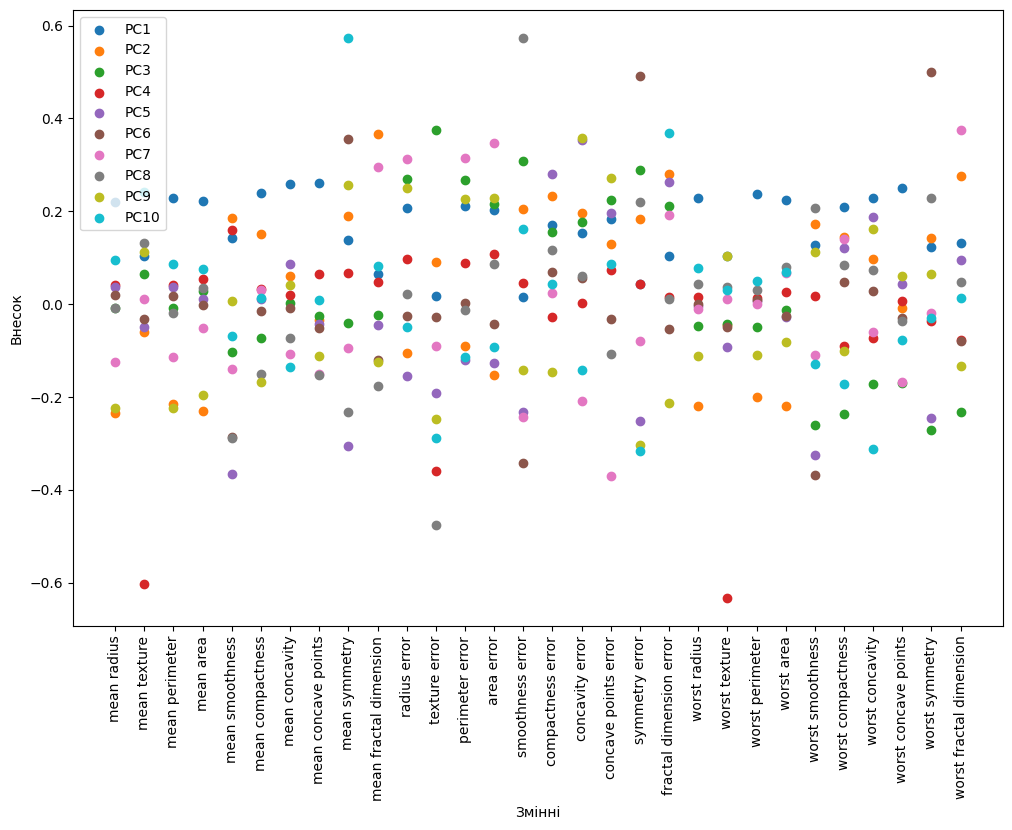

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Завантаження даних
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Стандартизація даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Вибір кількості головних компонент
pca = PCA().fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Знаходження оптимальної кількості головних компонент
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f'Кількість головних компонент, які пояснюють 95% дисперсії: {n_components}')

# Застосування PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Аналіз внеску змінних в головні компоненти
pc_names = [f'PC{i+1}' for i in range(n_components)]
component_names = [f'Component {i+1}' for i in range(X_pca.shape[1])]
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=pc_names)
print(components_df)

# Візуалізація
# Вибір двох змінних
feature_1 = 'mean radius'
feature_2 = 'mean texture'

# Візуалізація двох змінних
plt.figure(figsize=(10, 6))
plt.scatter(X[:, feature_names.tolist().index(feature_1)],
            X[:, feature_names.tolist().index(feature_2)],
            c=y, cmap='viridis')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('Візуалізація двох змінних')
plt.legend(['Злоякісний', 'Доброякісний'])
plt.show()


# Візуалізація в координатах PC1, PC2
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Візуалізація в координатах PC1, PC2')
plt.legend(['Злоякісний', 'Доброякісний'])
plt.show()

# Візуалізація внеску змінних
plt.figure(figsize=(12, 8))
plt.scatter(feature_names, components_df.iloc[0, :], label='PC1')
plt.scatter(feature_names, components_df.iloc[1, :], label='PC2')
plt.scatter(feature_names, components_df.iloc[2, :], label='PC3')
plt.scatter(feature_names, components_df.iloc[3, :], label='PC4')
plt.scatter(feature_names, components_df.iloc[4, :], label='PC5')
plt.scatter(feature_names, components_df.iloc[5, :], label='PC6')
plt.scatter(feature_names, components_df.iloc[6, :], label='PC7')
plt.scatter(feature_names, components_df.iloc[7, :], label='PC8')
plt.scatter(feature_names, components_df.iloc[8, :], label='PC9')
plt.scatter(feature_names, components_df.iloc[9, :], label='PC10')
plt.xticks(rotation=90)
plt.xlabel('Змінні')
plt.ylabel('Внесок')
plt.legend()
plt.show()
